In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, f1_score, recall_score, precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# -------------------------------------------
# 1️ Load and Clean Dataset
# -------------------------------------------
dataset = pd.read_csv('iris.csv')
print(" Dataset loaded successfully:", dataset.shape)
print(dataset.head())

# Standardize column names
dataset.columns = [col.strip(' (cm)').replace(' ', '_').lower() for col in dataset.columns]


# Encode target if it's categorical
if dataset['target'].dtype == 'object':
    dataset['target'] = dataset['target'].astype('category').cat.codes

dataset 

 Dataset loaded successfully: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
dataset['sepal_ratio'] = dataset['sepal_length'] / dataset['sepal_width']
dataset['petal_ratio'] = dataset['petal_length'] / dataset['petal_width']

# Keep only required columns
expected_cols = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
    'sepal_ratio', 'petal_ratio', 'target'
]
dataset = dataset[expected_cols]

print(" Feature engineering complete. Columns now:", list(dataset.columns))

# -------------------------------------------
# 3️ Split Data
# -------------------------------------------
X = dataset.drop('target', axis=1).astype('float32')
y = dataset['target'].astype('int32')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f" Data split: Train={X_train.shape}, Test={X_test.shape}")

 Feature engineering complete. Columns now: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio', 'petal_ratio', 'target']
 Data split: Train=(120, 6), Test=(30, 6)


In [3]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
logreg.fit(X_train, y_train)
print(" Logistic Regression model trained successfully.")

prediction_lr = logreg.predict(X_test)

cm = confusion_matrix(y_test, prediction_lr)
f1 = f1_score(y_test, prediction_lr, average='micro')
recall = recall_score(y_test, prediction_lr, average='micro')
precision = precision_score(y_test, prediction_lr, average='micro')

train_acc_lr = logreg.score(X_train, y_train)
test_acc_lr = logreg.score(X_test, y_test)

print(f"""
🔹 Logistic Regression Metrics:
  Train Accuracy: {train_acc_lr:.4f}
  Test Accuracy: {test_acc_lr:.4f}
  Precision: {precision:.4f}
  Recall: {recall:.4f}
  F1 Score: {f1:.4f}
""")


 Logistic Regression model trained successfully.

🔹 Logistic Regression Metrics:
  Train Accuracy: 0.9667
  Test Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000



In [4]:
print(' Training Random Forest...')
Rand_rg = RandomForestClassifier(random_state=42)
Rand_rg.fit(X_train, y_train)
print(" Random Forest trained successfully.")

prediction_rf = Rand_rg.predict(X_test)

cm_rf = confusion_matrix(y_test, prediction_rf)
f1_rf = f1_score(y_test, prediction_rf, average='micro')
recall_rf = recall_score(y_test, prediction_rf, average='micro')
precision_rf = precision_score(y_test, prediction_rf, average='micro')

train_acc_rf = Rand_rg.score(X_train, y_train)
test_acc_rf = Rand_rg.score(X_test, y_test)

print(f"""
 Random Forest Metrics:
  Train Accuracy: {train_acc_rf:.4f}
  Test Accuracy: {test_acc_rf:.4f}
  Precision: {precision_rf:.4f}
  Recall: {recall_rf:.4f}
  F1 Score: {f1_rf:.4f}
""")


 Training Random Forest...
 Random Forest trained successfully.

 Random Forest Metrics:
  Train Accuracy: 1.0000
  Test Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000



 Plotting confusion matrix for Logistic Regression...


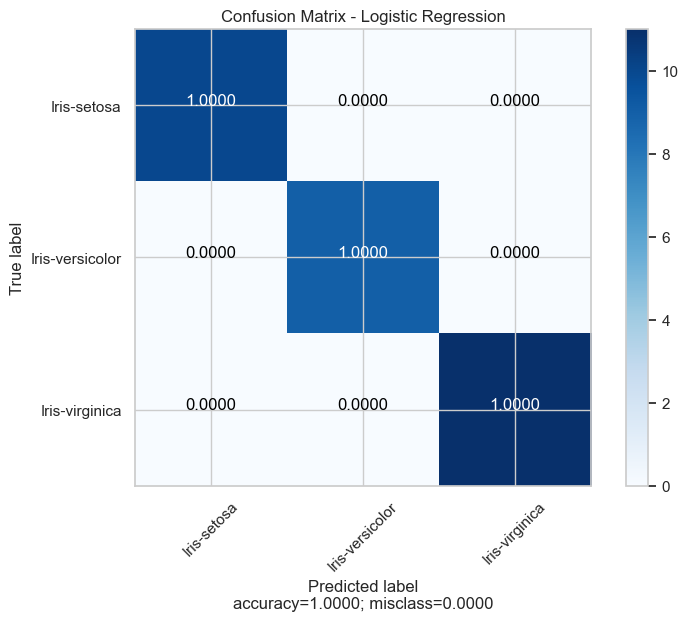

In [7]:
def plot_cm(cm, target_name, title='Confusion Matrix', cmap=None, Normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    missclass = 1 - accuracy
    cmap = plt.get_cmap("Blues") if cmap is None else cmap
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_name))
    plt.xticks(tick_marks, target_name, rotation=45)
    plt.yticks(tick_marks, target_name)

    if Normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if Normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel(f'Predicted label\naccuracy={accuracy:.4f}; misclass={missclass:.4f}')
    plt.show()

print(' Plotting confusion matrix for Logistic Regression...')
target_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_cm(cm, target_name, title='Confusion Matrix - Logistic Regression')

[0.08981849 0.02090242 0.29658458 0.34867065 0.13372385 0.11030001]


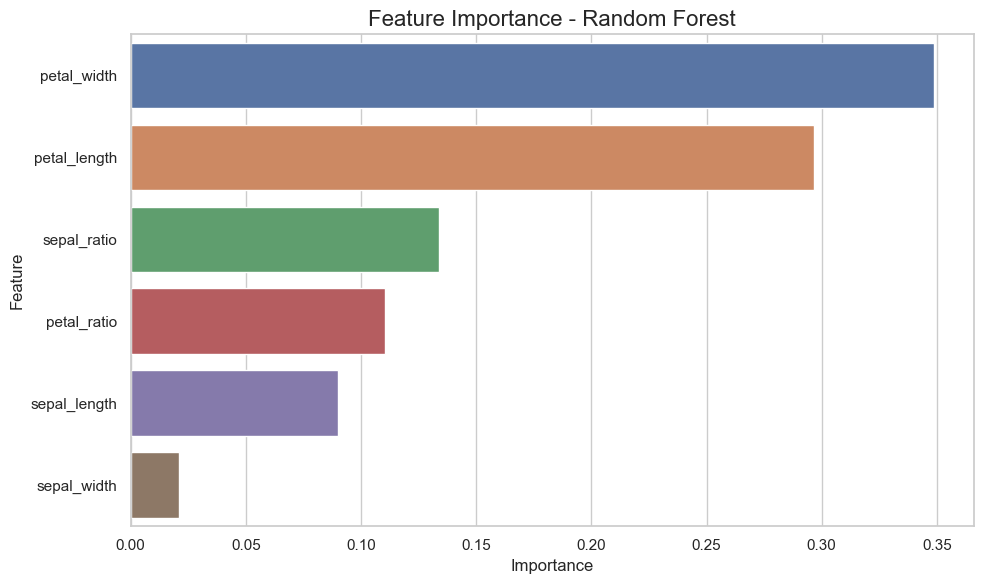

In [9]:
importances = Rand_rg.feature_importances_
print(importances)
labels = X.columns  # Only features, exclude target

feature_df = pd.DataFrame({'Feature': labels, 'Importance': importances})
features = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance - Random Forest', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
